# **Prerequisites**

**Remembert that we have to always include step one, two, and three of last week's lecture. Why? Because we are using the free version of Google Colab.**

In [1]:
#Step 1: Install Dependencies
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark

#Step 2: Add environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.3.0-bin-hadoop3"

#Step 3: Initialize Pyspark
import findspark
findspark.init()

In [2]:
#creating spark context
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

# **Spark MLlib (Part 1)**

One of the motivations behind the creation of Spark was to help applications run algorithms efficiently at scale. Over the last few versions of Spark, the Machine Learning Library (MLlib) has steadily increased its offerings to make Machine Learning scalable and easy to use by providing sets of commonly used Machine Learning algorithms and tools to facilitate the process of building and evaluating ML models. But, what is machine learning?

### **What is Machine Learning (ML)?**
Machine Learning is a vast and fascinating field of study, which combines parts of other fields like mathematics, statistics, and computer science. It is a method of teaching computers to learn patterns for most of the time the purpose of making decisions or predictions.
Unlike traditional, hard-coded software, ML gives you only probabilistic outputs based on the analysis of the imperfect data provided by the user. The one thing that people often do not realize is that  The more data you can provide to ML algorithms, the more accurate the output will be.


Before going deeper into Machine Learning, it is important to learn some of the basic terms used in ML. 

**Observation:** This term comes from the statistics field. An observation is an instance of the entity that is used for learning. *For example, emails are considered to be observations.*              

**Label:** A value used to label an observation. *For example, “spam” or “not spam” are two possible values used to label emails.*

**Features:** These are important attributes about observations that most likely have the strongest influence in the output of the prediction. *Examples are the email sender's IP address, the number words, the number of capital words, and so on.*

In practice we usually  split or divide  the collected data into three portions: **training data, validation data, and test data**

**Training data:** This is a portion of the observations used to train a chosen ML algorithm to produce a model.

**Validation data:** This is a portion of the observations used to evaluate the performance of the ML model during the model tuning process.                                      
**Test data:** This is a portion of the observations used to evaluate the performance of the ML model after the tuning process is finalized.

***N.B: The test data portion is roughly about 70 percent or 80 percent of the original data set.*** 


### **Types of Learning**

As mentioned, Machine Learning is about teaching machines to learn patterns from previous data for the purpose of making decisions or predictions. Usually, These tasks are widely applicable to many different types of problem, and each problem type requires a different way of learning. In general, there are three types of learnings: **supervised, unsupervised, and reinforcement learning**

* In **supervised learning**, your data consists of a set of input records, each of which has associated labels, and the goal is to predict the output label(s) given a new
unlabeled input. These output labels can either be **discrete** or **continuous**, which brings us to the two types of supervised learning algorithms: **classification and regression.**
    * **Classification is** about classifying observations into discrete or categorical classes. One way that you probably encounter this every day is when your email provider identifies spam versus non spam email. In classification, the groupings or the categorization is provided by the user. So, in this case, we provide a list of emails known to be spam to the machine learning algorithm and tell it to go find other ones like this.

    * **Regression** is about predicting real values from observations. Unlike classification, the predicted value is not discrete, but rather it is continuous. Examples of regression problems include predicting a house price based on its location and size, or predicting the stock price of a company, or even predicting someone’s income based the background and education of a set of people.


* With **unsupervised learning**, as the name suggest there is no supervision which means that what you do is give the ML algorithm some data and ask it to go fishing. Or Ask it to go find something, but  do not give it an expected output. So, one of the key features here is to identify the hidden patterns within the data without adding your bias as to where the patterns might be. This is a more abstract application of machine learning, but you can yield really interesting results and use it for things such as ***recommendations for new movies to watch.*** One of the most used unsupervised learning algorithm is **Clustering**

   * **Clustering** is a very interesting machine learning method/algorithm that takes inputs and converts them into groups. Note that the groups are not known in advance. Clustering can be really helpful in marketing when trying to figure out the different groups of customers and how to group them. Think about customers that spend a lot of money versus a little money. Maybe we want to have different loyalty programs. You may not be able to figure out in advance how many different groups of customers you have or how to clusters them, so you can use this algorithm to figure that out.

* Last but not least is **reinforcement learning**. Unlike the first two types of learning, reinforcement does not learn from data. Instead, it learns from interacting with an environment through a series of actions, and the feedback loop provides the information it uses to make adjustments with the goal of maximizing some reward. In other words, it learns from its own experience.

***N.B: At this point, Spark MLlib does not include any reinforcement learning algorithms. The following sections will focus on the first two types of learnings.***


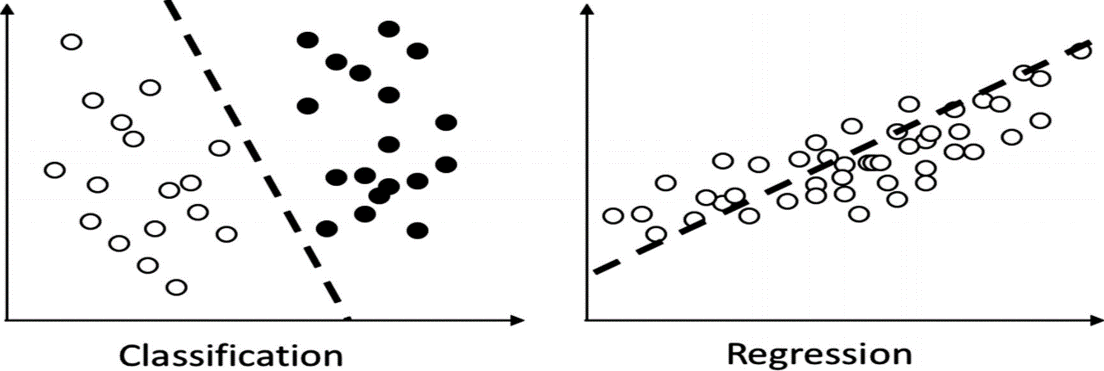

**A simple mental model to use to distinguish classification from regression is that classification is about separating the data into various buckets and regression is about fitting the best line to the data**


### **The ML Process**


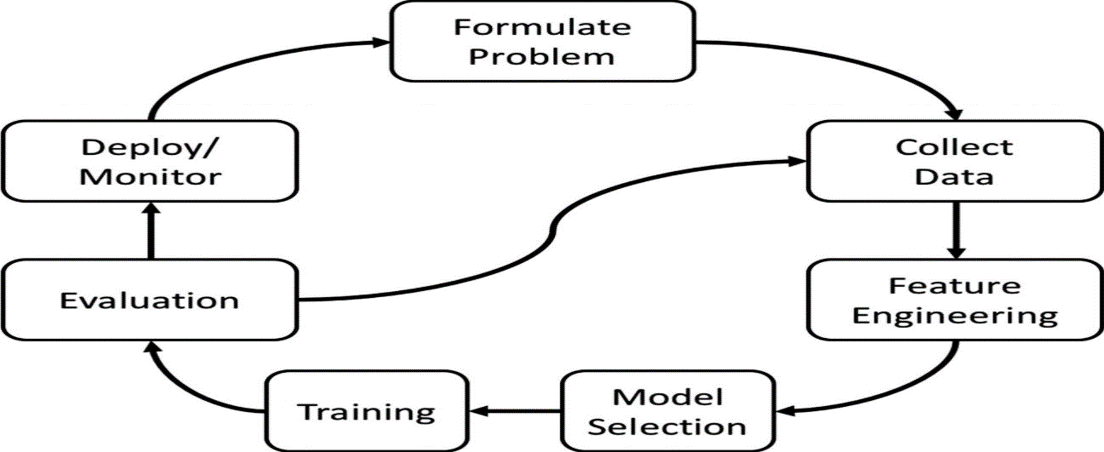

To be effective at applying machine learning to the development of intelligent applications, you should consider studying and adopting a set of best practices that most ML practitioners follow. 

*  Make sure  the problem is clearly understood, 

*  Identify and collect the necessary types of and an appropriate amount of data to support the problem at hand. The quality and quantity of the collected data will have a direct impact on the performance of the trained ML model

*  Feature engineering is one of the most important and time-consuming steps in this process. This step is mainly about data cleaning and using domain knowledge to identify key attributes or features about observations that will be useful to the ML algorithms to learn the direct relationship between the training data and provided labels. 

*  The next steps after feature engineering are selecting an appropriate ML model or algorithm and training it. Given that there are many available algorithms to solve similar ML tasks, the question is, what is the best model or models to use?

*  Another important step in the ML development process is the model evaluation task. It is both necessary and challenging. The goal of this step is to not only answer the question of how well a model performs but also to know when to stop tuning the model because its performance has reached the established success metrics.


### **Why Spark MLlib?**

SO far we have covered machine learning in general, Now let us focus on spark mllib. There are many ML libraries to choose from especially right now that the tech world is so advanced. However, there are two main reasons why one may wish to pick Spark MLlib over the other options. 
* The first one is the **ease of use**. Spark SQL provides a user-friendly way of performing data exploratory analysis, and the MLlib library provides a means to build, manage complex ML pipelines. 

* The second one is that **Spark is able to perform ML at scale**. Meaning that The combination of the Spark unified data analytic engine and the MLlib library can support training machine learning models with billions of observations and thousands of features.


### **Spark MLlib: Classification**

In a classification problem, the aim is to separate the inputs into a discrete set of classes or labels. There are three types of classification problems. 

* **Binary classification:** This is where the label to predict has only two possible classes (for example, fraud or not fraud, dog or not dog).

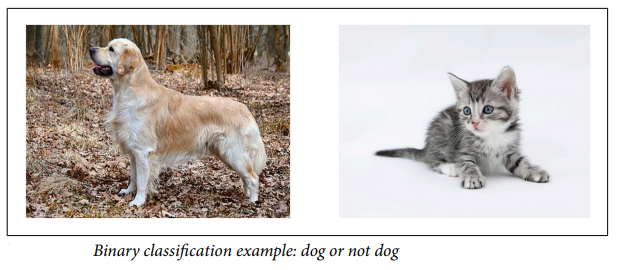

* **Multiclass classification:** Also known as multinomial classification is where the label to predict has more than two possible classes (for example, whether an image is a dog, cat, or bird).

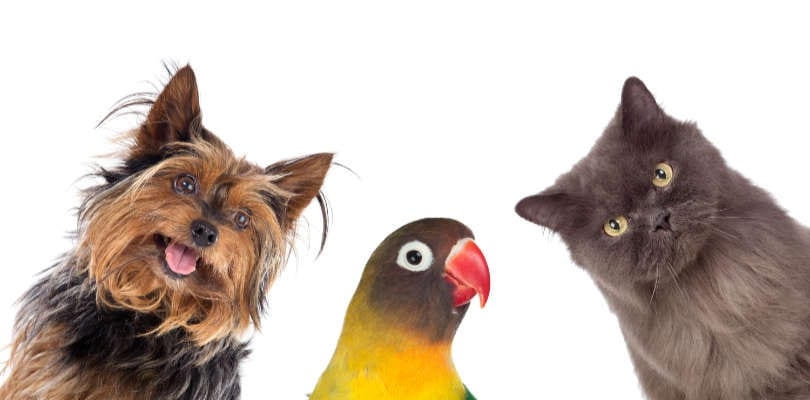
* **Multilabel classification:** This is where each observation can belong to more than one class. Movie genres are a good example of this. A movie can be classified as both action and comedy.
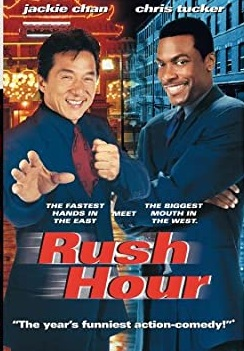


### **Spark MLlib: Regression**

Regression is designed to predict a real number or continuous value. For example, you may want to predict the sales revenue for next quarter for a ompany, or the income amount of a population, or the amount of rain in a certain region of the world. With regression there is always a relationship between 2 or more variables that are dependent of each other.

 ***For example, the price of an appartement depends on it size.***

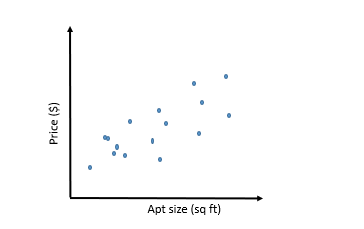

**N.B: Regression can be linear or non-linear**. 

### **Clustering**
Clustering is an unsupervised learning technique, in short, you are working on data, without having any information about a target attribute or a dependent variable. The general idea of clustering is to find some intrinsic structure in the data, often referred to as groups of similar objects. The algorithm studies the data to identify these patterns or groups such that each member in a group is closer to another member in the group (**lower intracluster distance**) and farther from another member in a different group (**higher inter-cluster distance**).

For example, if we are trying to group some people based on their heights and weights, we can use clustering to measure the closest individuals and create clusters or groups. 

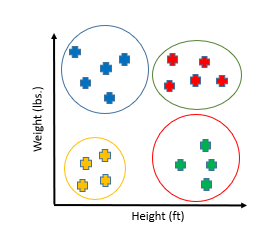


The END